#### Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Loading the Data:

In [3]:
df_train = pd.read_csv("C:/Users/USER/Downloads/Driver Behaviour Analysis/train_motion_data.csv")
df_test  = pd.read_csv("C:/Users/USER/Downloads/Driver Behaviour Analysis/test_motion_data.csv")

In [4]:
df_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [5]:
df_test.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [6]:
# Checking the shape of the Dataframe
df_train.shape

(3644, 8)

In [7]:
df_test.shape

(3084, 8)

In [8]:
# Checking the Datatypes:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [29]:
# Checking the null values:
df_train.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [30]:
df_test.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [31]:
# Description of the Dataframe
df_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [32]:
df_test.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.106234,-0.131791,0.045011,0.003192,0.001452,0.011472,819830.000324
std,0.968089,0.904398,0.997625,0.066636,0.120963,0.113535,525.760733
min,-4.854163,-7.621754,-6.106982,-0.514959,-1.309466,-0.976315,818922.000000
25%,-0.408916,-0.625868,-0.461438,-0.024435,-0.045739,-0.027031,819338.000000
50%,0.051892,-0.096929,0.054154,0.001222,-0.000993,0.002291,819832.500000
75%,0.579148,0.393118,0.575119,0.028100,0.043601,0.035888,820292.250000
max,5.864980,4.308813,5.564037,1.490511,1.707598,0.719447,820709.000000


In [33]:
df_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [34]:
df_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [9]:
df_train['Class'] = df_train['Class'].replace({'SLOW':0,'NORMAL':1,'AGGRESSIVE':2})

In [10]:
df_test['Class'] = df_test['Class'].replace({'SLOW':0,'NORMAL':1,'AGGRESSIVE':2})

In [11]:
df_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,0,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,0,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,0,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,0,3583791


In [12]:
df_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,2,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,2,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,2,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,2,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,2,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,0,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,0,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,0,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,0,820708


### Merging both Train and Test DataFrames:

In [13]:
df = pd.concat([df_train,df_test])

In [14]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,0,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,0,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,0,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,0,820708


In [15]:
df.to_csv("Final_df1.csv")

In [16]:
pd.read_csv("C:/Users/USER/Downloads/Final_df1.csv")
df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631


### Checking the Outliers:

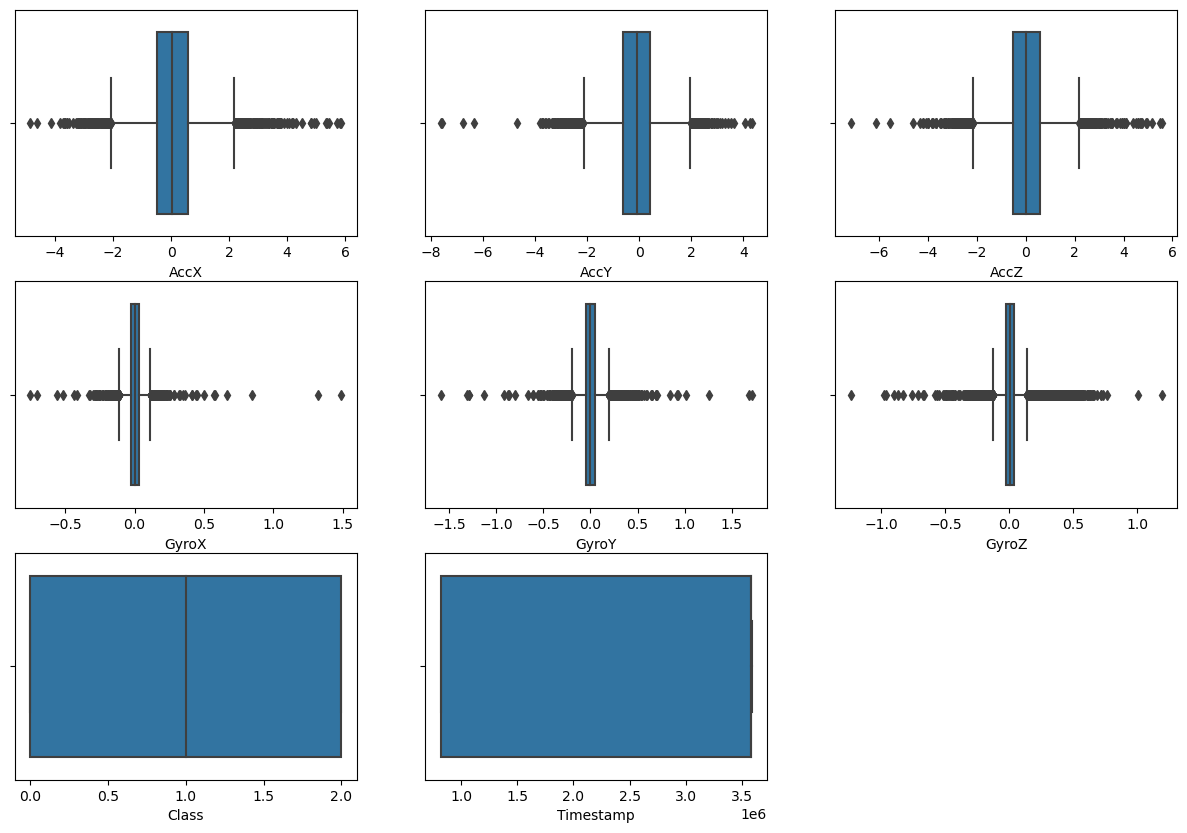

In [25]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

## Outlier treatment using Inter Quartile Range(IQR)

In [26]:
Q1=df["AccX"].quantile(0.25)
Q3=df["AccX"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_AccX=[]
for i in df["AccX"]:
    if  (i>upper_bound):
           new_AccX.append(upper_bound)
    elif (i<lower_bound):
        new_AccX.append(lower_bound)
    else:
         new_AccX.append(i)

df["AccX"]=new_AccX

<AxesSubplot:xlabel='AccX'>

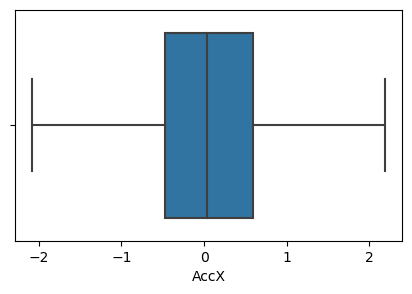

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(df["AccX"])

In [28]:
Q1=df["AccY"].quantile(0.25)
Q3=df["AccY"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_AccY=[]
for i in df["AccY"]:
    if  (i>upper_bound):
           new_AccY.append(upper_bound)
    elif (i<lower_bound):
        new_AccY.append(lower_bound)
    else:
         new_AccY.append(i)

df["AccY"]=new_AccY

<AxesSubplot:xlabel='AccY'>

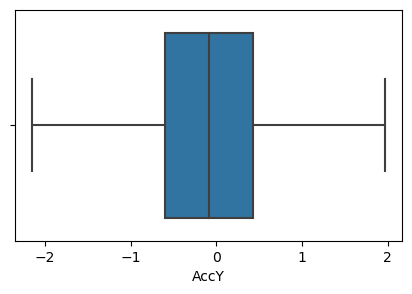

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(df["AccY"])

In [30]:
Q1=df["AccZ"].quantile(0.25)
Q3=df["AccZ"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_AccZ=[]
for i in df["AccZ"]:
    if  (i>upper_bound):
           new_AccZ.append(upper_bound)
    elif (i<lower_bound):
          new_AccZ.append(lower_bound)
    else:
         new_AccZ.append(i)

df["AccZ"] = new_AccZ

<AxesSubplot:xlabel='AccZ'>

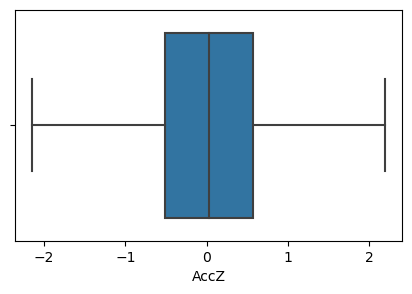

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(df["AccZ"])

In [32]:
Q1=df["GyroX"].quantile(0.25)
Q3=df["GyroX"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_GyroX=[]
for i in df["GyroX"]:
    if  (i>upper_bound):
           new_GyroX.append(upper_bound)
    elif (i<lower_bound):
          new_GyroX.append(lower_bound)
    else:
         new_GyroX.append(i)

df["GyroX"] = new_GyroX

<AxesSubplot:xlabel='GyroX'>

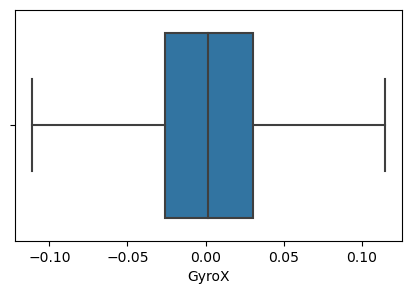

In [33]:
plt.figure(figsize=(5,3))
sns.boxplot(df["GyroX"])

In [34]:
Q1=df["GyroY"].quantile(0.25)
Q3=df["GyroY"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_GyroY=[]
for i in df["GyroY"]:
    if  (i>upper_bound):
           new_GyroY.append(upper_bound)
    elif (i<lower_bound):
          new_GyroY.append(lower_bound)
    else:
         new_GyroY.append(i)

df["GyroY"] = new_GyroY

<AxesSubplot:xlabel='GyroY'>

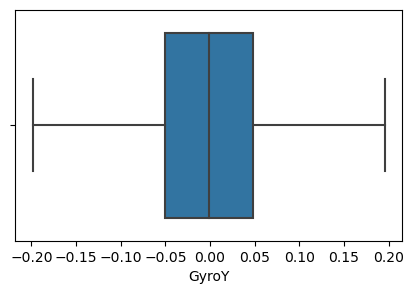

In [35]:
plt.figure(figsize=(5,3))
sns.boxplot(df["GyroY"])

In [36]:
Q1=df["GyroZ"].quantile(0.25)
Q3=df["GyroZ"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_GyroZ=[]
for i in df["GyroZ"]:
    if  (i>upper_bound):
           new_GyroZ.append(upper_bound)
    elif (i<lower_bound):
          new_GyroZ.append(lower_bound)
    else:
         new_GyroZ.append(i)

df["GyroZ"] = new_GyroZ

<AxesSubplot:xlabel='GyroZ'>

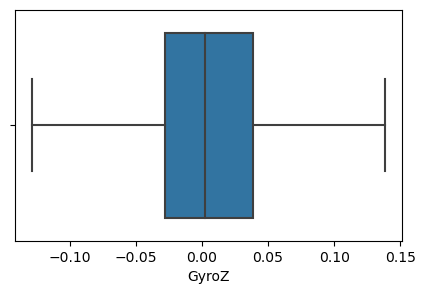

In [37]:
plt.figure(figsize=(5,3))
sns.boxplot(df["GyroZ"])

## Data Visualization:

In [38]:
df.describe(include="all")

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6.728000e+03
mean,0.062476,-0.093192,0.023807,0.001837,-0.001236,0.005395,0.899376,2.316251e+06
std,0.888250,0.837438,0.903009,0.049554,0.089193,0.067062,0.814511,1.376747e+06
min,-2.076977,-2.149121,-2.143724,-0.110796,-0.198569,-0.128129,0.000000,8.189220e+05
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,0.000000,8.199088e+05
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,1.000000,3.581780e+06
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,2.000000,3.582777e+06
max,2.186078,1.967335,2.187569,0.114614,0.195744,0.138208,2.000000,3.583791e+06


#### Univariate analysis:

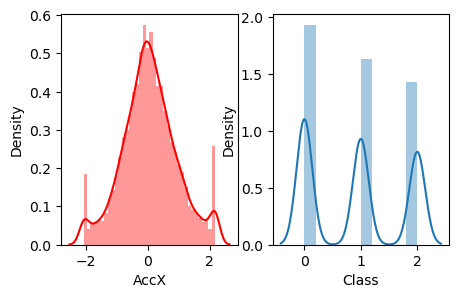

In [39]:
# Checking the distribution (normal or skewed)

plt.figure(figsize=(5,3))
plt.subplot(121)
sns.distplot(df["AccX"],color = "r")
plt.subplot(122)
sns.distplot(df["Class"])
plt.show()


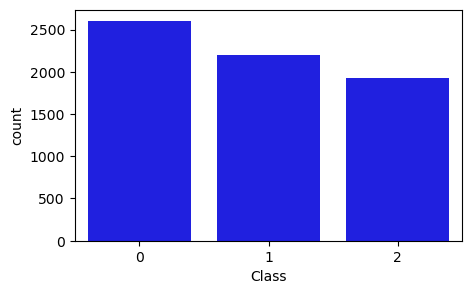

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(df["Class"],color="blue")
plt.show()

#### Bivariate analysis:

Driving Behaviours with acceleration on X-axis:

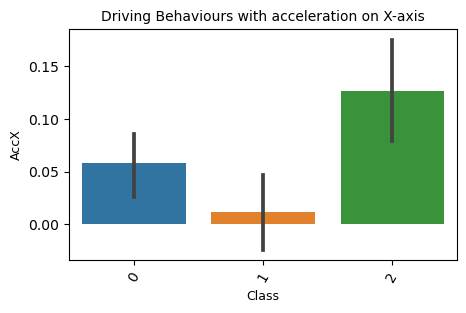

In [41]:
plt.figure(figsize=(5,3))
plt.title("Driving Behaviours with acceleration on X-axis",fontsize=10)
df.sort_values(['AccX'],ascending=False)
sns.barplot(x=df['Class'], y=df['AccX'])
plt.xlabel("Class",fontsize=9)
plt.ylabel("AccX",fontsize=9)
plt.xticks(rotation = 60,fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

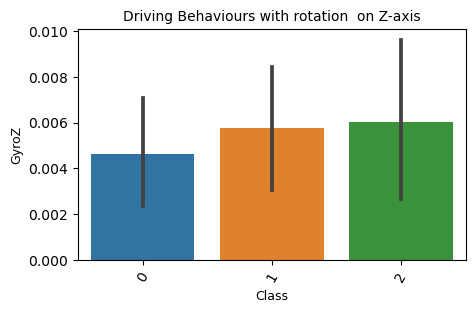

In [42]:
plt.figure(figsize=(5,3))
plt.title("Driving Behaviours with rotation  on Z-axis",fontsize=10)
Time= df.sort_values(['GyroZ'],ascending=False)
sns.barplot(x=df['Class'], y=df['GyroZ'])
plt.xlabel("Class",fontsize=9)
plt.ylabel("GyroZ",fontsize=9)
plt.xticks(rotation = 60,fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

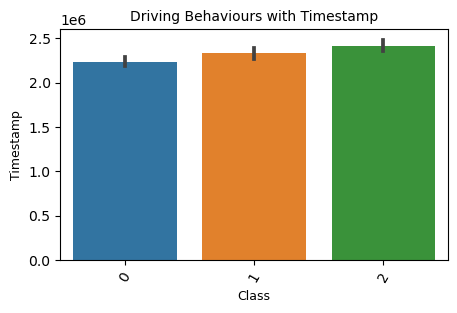

In [43]:
plt.figure(figsize=(5,3))
plt.title("Driving Behaviours with Timestamp",fontsize=10)
Time= df.sort_values(['Timestamp'],ascending=False)
sns.barplot(x=df['Class'], y=df['Timestamp'])
plt.xlabel("Class",fontsize=9)
plt.ylabel("Timestamp",fontsize=9)
plt.xticks(rotation = 60,fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

#### Multivariate analysis:

<AxesSubplot:>

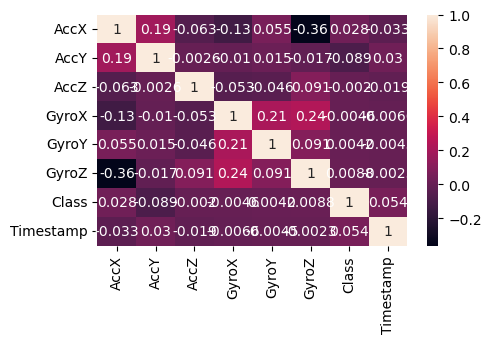

In [44]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True)


### Data Preprocessing:

In [17]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,0,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,0,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,0,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,0,820708


In [18]:
y = df['Class']
X = df.drop('Class',axis=1)
    

In [19]:
df["Class"].unique()

array([1, 2, 0], dtype=int64)

In [20]:
X

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,3581631
...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,820708


In [21]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3079    0
3080    0
3081    0
3082    0
3083    0
Name: Class, Length: 6728, dtype: int64

In [22]:
y = df['Class']
X = df.drop('Class',axis=1)
    

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test ,y_train ,y_test = train_test_split(X , y , test_size = 0.3 ,random_state = 71)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns, index=X_test.index)    
    

In [27]:
X_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
2941,0.537075,0.311615,0.426377,-0.365839,0.196406,2.008166,0.921055
55,-0.006182,-0.270522,0.148840,-0.198427,0.113297,-0.095032,-1.086957
1993,0.349653,0.755598,-0.127875,0.015860,0.543212,-0.216535,-1.086109
1597,0.138219,-1.176200,0.011012,-0.627002,-0.196641,-0.248232,-1.086295
1381,-0.244729,-0.738761,1.081380,0.471221,-1.886303,0.021189,-1.086380


In [28]:
X_test.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
2960,-0.781909,0.101198,0.802991,1.857394,0.171411,3.313008,0.921063
2271,0.648426,-2.705377,-0.543983,-0.392625,-0.203514,-0.046827,0.920715
2912,-1.465645,-1.933819,-0.531655,-0.678342,-0.953364,-0.131351,0.921044
1768,0.213527,-0.260282,0.183132,0.935511,0.788163,0.079299,-1.086229
670,1.194835,2.861541,-0.522379,0.158719,0.698181,-0.301060,-1.086716


In [29]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
y_train.head()

2941    0
55      2
1993    0
1597    1
1381    1
Name: Class, dtype: int64

In [31]:
y_test.head()

2960    0
2271    2
2912    0
1768    1
670     2
Name: Class, dtype: int64

### Applying Algorithms:

### SVM Classifier

In [58]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

#### Evalution of Model with SVC classifier For Training Data

In [59]:
svm_train_pred = model.predict(X_train)

In [60]:
svm_train_pred[:5]

array([0, 0, 0, 1, 0], dtype=int64)

#### Confusion matrix For Traing Data with SVM Classifier

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,svm_train_pred)

array([[1592,  112,  117],
       [1073,  299,  162],
       [ 685,  127,  542]], dtype=int64)

#### Accuracy Score For Training Data With SVM Classifier

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,svm_train_pred)*100

51.66702059885326

#### Classification Report For Training Data With SVM Classifier

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_train,svm_train_pred))

              precision    recall  f1-score   support

           0       0.48      0.87      0.62      1821
           1       0.56      0.19      0.29      1534
           2       0.66      0.40      0.50      1354

    accuracy                           0.52      4709
   macro avg       0.56      0.49      0.47      4709
weighted avg       0.55      0.52      0.48      4709



#### Evalution of Model with SVM Classifier For Testing Data

In [64]:
svm_test_pred = model.predict(X_test)

In [65]:
svm_test_pred[:5]

array([2, 2, 2, 0, 2], dtype=int64)

#### Confusion matrix For Testing Data with SVM Classifier

In [66]:
confusion_matrix(y_test,svm_test_pred)

array([[619,  93,  71],
       [502,  87,  74],
       [314,  83, 176]], dtype=int64)

#### Accuracy Score For Testing Data With SVM Classifier

In [67]:
accuracy_score(y_test,svm_test_pred)*100

43.684992570579496

#### Classification Report For Testing Data With SVM Classifier

In [68]:
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.79      0.56       783
           1       0.33      0.13      0.19       663
           2       0.55      0.31      0.39       573

    accuracy                           0.44      2019
   macro avg       0.44      0.41      0.38      2019
weighted avg       0.43      0.44      0.39      2019



### Hyperparameter tuning for SVM Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


### Xgboost Classifier

In [71]:
from xgboost import XGBClassifier
import xgboost as xgb
model=xgb.XGBClassifier()


In [72]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### Evalution of Model with XG Boost Technique For Training Data

In [73]:
Xg_train_pred = model.predict(X_train)

In [74]:
Xg_train_pred[:5]

array([0, 2, 0, 1, 1], dtype=int64)

#### Confusion matrix For Traing Data with XG Boost

In [75]:
confusion_matrix(y_train,Xg_train_pred)

array([[1821,    0,    0],
       [   0, 1534,    0],
       [   0,    0, 1354]], dtype=int64)

#### Accuracy Score For Training Data With XG Boost

In [76]:
accuracy_score(y_train,Xg_train_pred)*100

100.0

#### Classification Report For Training Data With XG Boost

In [77]:
print(classification_report(y_train,Xg_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00      1534
           2       1.00      1.00      1.00      1354

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



#### Evalution of Model with XG Boost Technique For Testing Data

In [78]:
Xg_test_pred = model.predict(X_test)

In [79]:
Xg_test_pred[:5]

array([0, 2, 0, 1, 2], dtype=int64)

#### Confusion matrix For Testing Data with XG Boost

In [80]:
confusion_matrix(y_test,Xg_test_pred)

array([[783,   0,   0],
       [  0, 663,   0],
       [  0,   0, 573]], dtype=int64)

#### Accuracy Score For Testing Data With XG Boost

In [81]:
accuracy_score(y_test,Xg_test_pred)*100

100.0

#### Classification Report For Testing Data With XG Boost

In [82]:
print(classification_report(y_test,Xg_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       663
           2       1.00      1.00      1.00       573

    accuracy                           1.00      2019
   macro avg       1.00      1.00      1.00      2019
weighted avg       1.00      1.00      1.00      2019



### Gradient Boosting Classifier:

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)
gbt.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=1, max_features=0.2, n_estimators=300,
                           random_state=42, subsample=0.8)

#### Evalution of Model with Training Data

In [33]:
gbt_train_pred = gbt.predict(X_train)
gbt_train_pred[:10]

array([0, 2, 0, 1, 1, 1, 1, 2, 1, 2], dtype=int64)

#### Confusion Matrix for Training Data

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train ,gbt_train_pred)

array([[1797,   16,    8],
       [   0, 1533,    1],
       [   8,    0, 1346]], dtype=int64)

#### Accuracy for Training Data

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,gbt_train_pred)*100

99.29921427054576

#### Classification Report For Training Data

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_train , gbt_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1821
           1       0.99      1.00      0.99      1534
           2       0.99      0.99      0.99      1354

    accuracy                           0.99      4709
   macro avg       0.99      0.99      0.99      4709
weighted avg       0.99      0.99      0.99      4709



#### Evaluation of Model With Test Data¶

In [39]:
gbt_test_pred = gbt.predict(X_test)
gbt_test_pred[:10]

array([0, 2, 0, 1, 2, 0, 0, 2, 2, 2], dtype=int64)

#### Confusion matrix For Testing Data

In [40]:
confusion_matrix(y_test,gbt_test_pred)

array([[758,  21,   4],
       [  0, 663,   0],
       [  3,   0, 570]], dtype=int64)

#### Accuracy for Test Data

In [41]:
accuracy_score(y_test,gbt_test_pred)*100

98.61317483902923

#### Classification Report For Testing Data¶

In [42]:
print(classification_report(y_test, gbt_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       783
           1       0.97      1.00      0.98       663
           2       0.99      0.99      0.99       573

    accuracy                           0.99      2019
   macro avg       0.99      0.99      0.99      2019
weighted avg       0.99      0.99      0.99      2019



#### Evaluating Model Performance


#### To Check Whether Our Model is Predicting Correctly or Not

In [43]:
gbt.predict([[-0.852127,0.099752,0.884941,2.277758,0.249374,1.982083,0.921063]])

array([0], dtype=int64)

In [44]:
gbt.predict([[0.724676,-2.422342,-0.598244,-0.524461,-0.265004,-0.006757,0.920715]])

array([2], dtype=int64)

In [45]:
gbt.predict([[-1.605878,-2.107116,-0.584670,-0.918836,-1.293761,-0.152476,0.921044]])

array([0], dtype=int64)

In [46]:
gbt.predict([[0.245243,-0.292253,0.202400,1.308767,1.095527,0.210684,-1.086229]])

array([1], dtype=int64)

In [47]:
gbt.predict([[1.327038,2.438794,-0.574456,0.236560,0.972076,-0.445053,-1.086716]])

array([2], dtype=int64)

### Cross Validation Score:

In [98]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define dataset
X, y = make_classification(n_samples=1000, n_features=7, n_informative=4, n_redundant=3, random_state=1)
# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X, y)
# make a single prediction
row = [[0.324256,0.518828,0.684341,1.000000,0.554706,1.000000,0.999897]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.929 (0.021)
Prediction: 1


### Random Forest Classifier:

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier(criterion='entropy')

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

### With Random Forest Checking Training Data

In [51]:
rfc_train_pred = rfc.predict(X_train)

In [52]:
rfc_train_pred[:5]

array([0, 2, 0, 1, 1], dtype=int64)

#### Confunsion matrix For Training Data 

In [53]:
confusion_matrix(y_train,rfc_train_pred)

array([[1821,    0,    0],
       [   0, 1534,    0],
       [   0,    0, 1354]], dtype=int64)

#### Accuracy For Training Data With Random Forest

In [54]:
accuracy_score(y_train,rfc_train_pred)*100

100.0

#### Classification Report For Training Data

In [55]:
print(classification_report(y_train, rfc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00      1534
           2       1.00      1.00      1.00      1354

    accuracy                           1.00      4709
   macro avg       1.00      1.00      1.00      4709
weighted avg       1.00      1.00      1.00      4709



#### With Random Forest Checking Testing Data

In [56]:
rfc_test_pred = rfc.predict(X_test)


In [57]:
rfc_test_pred[:5]

array([0, 2, 0, 1, 2], dtype=int64)

#### Confunsion matrix For Test Data

In [58]:
confusion_matrix(y_test,rfc_test_pred)

array([[766,  17,   0],
       [  0, 663,   0],
       [  0,   0, 573]], dtype=int64)

#### Accuracy For Test Data With Random Forest 

In [59]:
accuracy_score(y_test,rfc_test_pred)*100

99.1579990094106

#### Classification Report For Test Data of Random Forest

In [60]:
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       783
           1       0.97      1.00      0.99       663
           2       1.00      1.00      1.00       573

    accuracy                           0.99      2019
   macro avg       0.99      0.99      0.99      2019
weighted avg       0.99      0.99      0.99      2019



### Saving the model

In [61]:
import pickle 
pickle.dump(gbt,open('gbt.pkl','wb'))

In [ ]:
On The Top Of The Data We Have Used # 4 Algorithms

1. SVM Classifier

-->Accuracy after Hyperparameter tuning = 42.0
--> Accuracy after Hyperparameter tuning = 93.9

2. Xgboost Classifier

-->Training Accuracy = 100.0
-->Test Accuracy   = 100.0


3. Gradient Boosting Classifier 

-->Training Accuracy = 98.8
-->Test Accuracy   = 98.0


4. Random Forest Classifier

-->Training Accuracy = 100.0
-->Test Accuracy   = 99.3
